In [ ]:
#TODO Dataset description. WHat does each feature mean?

In [61]:
!pip install phik

  Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                 A. Morin                      Agua Grande  1876   
1                 A. Morin                            Kpime  1676   
2                 A. Morin                           Atsane  1676   
3                 A. Morin                            Akata  1680   
4                 A. Morin                           Quilla  1704   

   Review Date Cocoa Percent Company Location  Rating Bean Type  \
0         2016           63%           France    3.75             
1         2015           70%           France    2.75             
2         2015           70%           France    3.00             
3         2015           70%           France    3.50             
4         2015           70%           France    3.50             

  Broad Bean Origin  
0          Sao Tome  
1              Togo  
2              Togo  
3              Togo  
4              Peru  


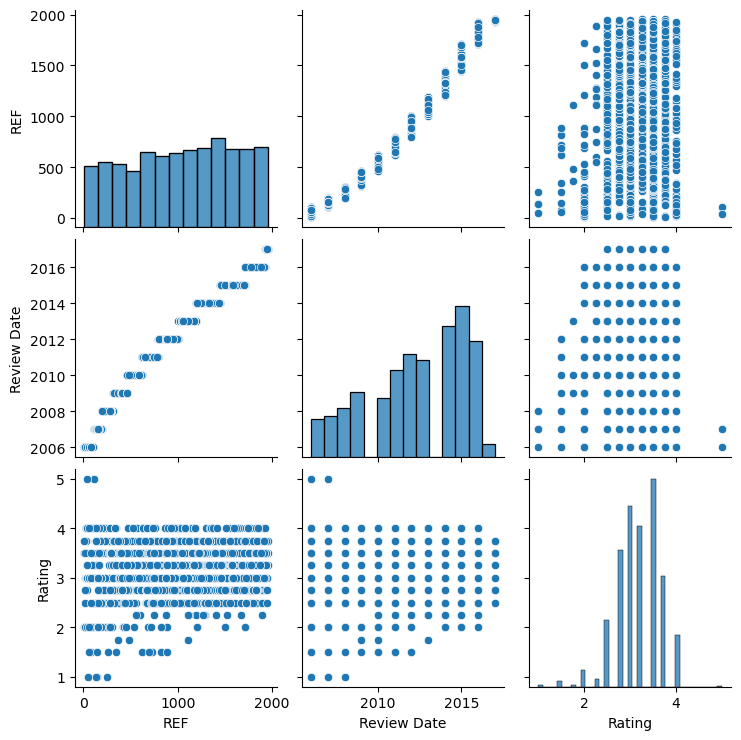

In [63]:
import pandas as pd
import seaborn as sns

#import dataset
df = pd.read_csv('flavors_of_cacao_mod.csv')
print(df.head())

#pair plot graphs
sns.pairplot(df)
#Make correlation matrix graph and other graphs for EDA
#TODO





In [ ]:
#Note down correlation observations from the correlation matrix. Include anything else that may be interesting
#TODO

In [47]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao_mod.csv')

comp_loc_counts = df['Company Location'].value_counts(normalize=True) * 100
print(comp_loc_counts)

print()
bean_counts = df['Broad Bean Origin'].value_counts(normalize=True) * 100
print(bean_counts)

#print(category_counts < 0.5)

Company Location
U.S.A.               42.562674
France                8.690808
Canada                6.963788
U.K.                  5.348189
Italy                 3.509749
Ecuador               3.008357
Australia             2.729805
Belgium               2.228412
Switzerland           2.116992
Germany               1.949861
Austria               1.448468
Spain                 1.392758
Colombia              1.281337
Hungary               1.225627
Venezuela             1.114206
Japan                 0.947075
Brazil                0.947075
Peru                  0.947075
Madagascar            0.947075
New Zealand           0.947075
Denmark               0.835655
Vietnam               0.612813
Scotland              0.557103
Guatemala             0.557103
Israel                0.501393
Costa Rica            0.501393
Argentina             0.501393
Poland                0.445682
Lithuania             0.334262
Honduras              0.334262
South Korea           0.278552
Nicaragua             

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('flavors_of_cacao_mod.csv')

df['Cocoa Percent'] = pd.to_numeric(df['Cocoa Percent'].str.replace('%', ''))

print(df.columns[[0, 1, 7]])
loc_df = df.drop(df.columns[[0, 1, 7, 8]], axis = 1)
bean_df = df.drop(df.columns[[0, 1, 5, 7]], axis = 1)

cut_df = loc_df

#Regions North America, Central America, South America, East Europe, Central Europe, West Europe, Africa, Asia, Oceanic
regions = {'NA':['U.S.A.', 'Canada', 'Mexico'], 
           'CA': ['Costa Rica', 'Honduras', 'Nicaragua', 'Guatemala', 'Domincan Republic', 'Puerto Rico', 'Grenada', 'St. Lucia', 'Martinique', 'Niacragua'],
           'SA':['Ecuador', 'Colombia', 'Venezuela', 'Brazil', 'Peru', 'Guatemala', 'Argentina', 'Bolivia', 'Chile', 'Eucador', 'Suriname'],
           'EEU':['Russia', 'Hungary', 'Lithuania', 'Sweden', 'Finland', 'Czech Republic'],
           'CEU':['Italy', 'Switzerland', 'Germany', 'Poland', 'Austria',],
           'WEU':['France', 'U.K.', 'Belgium', 'Spain', 'Denmark', 'Scotland', 'Ireland', 'Netherlands', 'Amsterdam', 'Iceland', 'Portugal', 'Wales'],
           'AF':['Israel', 'Madagascar', 'Sao Tome', 'South Africa', 'Ghana'],
           'AS':['Japan', 'Vietnam', 'South Korea', 'Singapore', 'Philippines', 'India'],
           'OC':['Australia', 'New Zealand', 'Fiji']}

for region, countries in regions.items():
    for i in countries:
        cut_df['Company Location'] = cut_df['Company Location'].replace(i, region)

print(f"Original data : \n{cut_df}")
categorical_columns = cut_df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(cut_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([cut_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded data : \n{df_encoded}")

Index(['Company (Maker-if known)', 'Specific Bean Origin or Bar Name',
       'Bean Type'],
      dtype='object')
Original data : 
       REF  Review Date  Cocoa Percent Company Location  Rating
0     1876         2016           63.0              WEU    3.75
1     1676         2015           70.0              WEU    2.75
2     1676         2015           70.0              WEU    3.00
3     1680         2015           70.0              WEU    3.50
4     1704         2015           70.0              WEU    3.50
...    ...          ...            ...              ...     ...
1790   647         2011           70.0              CEU    3.75
1791   749         2011           65.0              CEU    3.00
1792   749         2011           65.0              CEU    3.50
1793   781         2011           62.0              CEU    3.25
1794   486         2010           65.0              CEU    3.00

[1795 rows x 5 columns]
Encoded Employee data : 
       REF  Review Date  Cocoa Percent  Rating  Com

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.pairplot(df_encoded)
# plt.title('Pair Plot of Features')
# plt.show()

# # Visualize the distribution of the Target column according to the count of labels
# print(f'\nTarget Value Counts:\n',  df['Surv_status'].value_counts())
# # Plot a histogram of the values in the 'Target' column
# df['Surv_status'].value_counts().plot(kind='bar')

# Calculate correlation matrix

cols = [c for c in df_encoded.columns if c.startswith('Company Location_')]


for col in cols:
    filter_df = df_encoded[[col, 'Rating']]
    print(filter_df.corr())
    # correlation_matrix = filter_df.corr()
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    # plt.title('Correlation Matrix Heatmap')
    # plt.show()
    
# correlation_matrix = df_encoded.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()



                     Company Location_AF    Rating
Company Location_AF             1.000000 -0.026266
Rating                         -0.026266  1.000000
                     Company Location_AS    Rating
Company Location_AS             1.000000  0.007568
Rating                          0.007568  1.000000
                     Company Location_CA    Rating
Company Location_CA             1.000000 -0.029897
Rating                         -0.029897  1.000000
                      Company Location_CEU    Rating
Company Location_CEU              1.000000  0.069234
Rating                            0.069234  1.000000
                      Company Location_EEU    Rating
Company Location_EEU              1.000000 -0.005165
Rating                           -0.005165  1.000000
                     Company Location_NA    Rating
Company Location_NA             1.000000 -0.021071
Rating                         -0.021071  1.000000
                     Company Location_OC    Rating
Company Location_OC

Encoded data: 
       REF  Review Date  Cocoa Percent  Rating  Company Location_AF  \
0     1876         2016           63.0    3.75                  0.0   
1     1676         2015           70.0    2.75                  0.0   
2     1676         2015           70.0    3.00                  0.0   
3     1680         2015           70.0    3.50                  0.0   
4     1704         2015           70.0    3.50                  0.0   
...    ...          ...            ...     ...                  ...   
1790   647         2011           70.0    3.75                  0.0   
1791   749         2011           65.0    3.00                  0.0   
1792   749         2011           65.0    3.50                  0.0   
1793   781         2011           62.0    3.25                  0.0   
1794   486         2010           65.0    3.00                  0.0   

      Company Location_AS  Company Location_CA  Company Location_CEU  \
0                     0.0                  0.0              

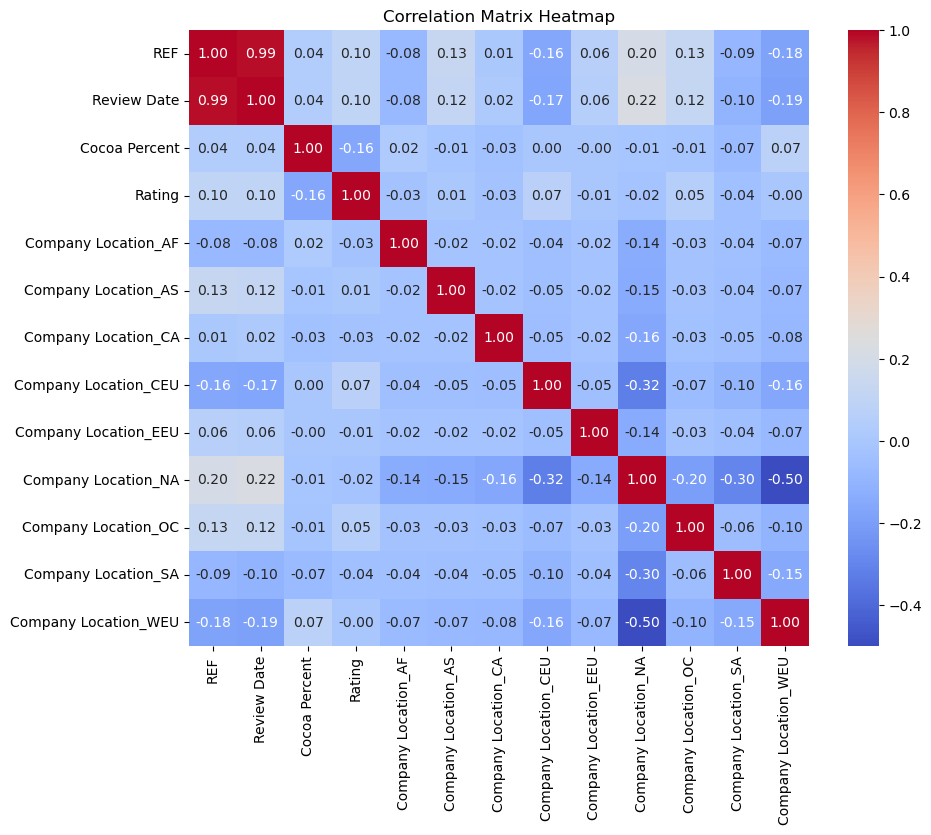

interval columns not set, guessing: ['REF', 'Review Date', 'Cocoa Percent', 'Rating', 'Company Location_AF', 'Company Location_AS', 'Company Location_CA', 'Company Location_CEU', 'Company Location_EEU', 'Company Location_NA', 'Company Location_OC', 'Company Location_SA', 'Company Location_WEU']

Phi_k correlation matrix: 
                           REF  Review Date  Cocoa Percent    Rating  \
REF                   1.000000     0.995780       0.000000  0.398507   
Review Date           0.995780     1.000000       0.000000  0.466141   
Cocoa Percent         0.000000     0.000000       1.000000  0.906723   
Rating                0.398507     0.466141       0.906723  1.000000   
Company Location_AF   0.520513     0.415577       0.000000  0.000000   
Company Location_AS   0.744785     0.715695       0.000000  0.545317   
Company Location_CA   0.560795     0.656656       0.000000  0.000000   
Company Location_CEU  0.671486     0.660344       0.000000  0.000000   
Company Location_EEU  0.5607

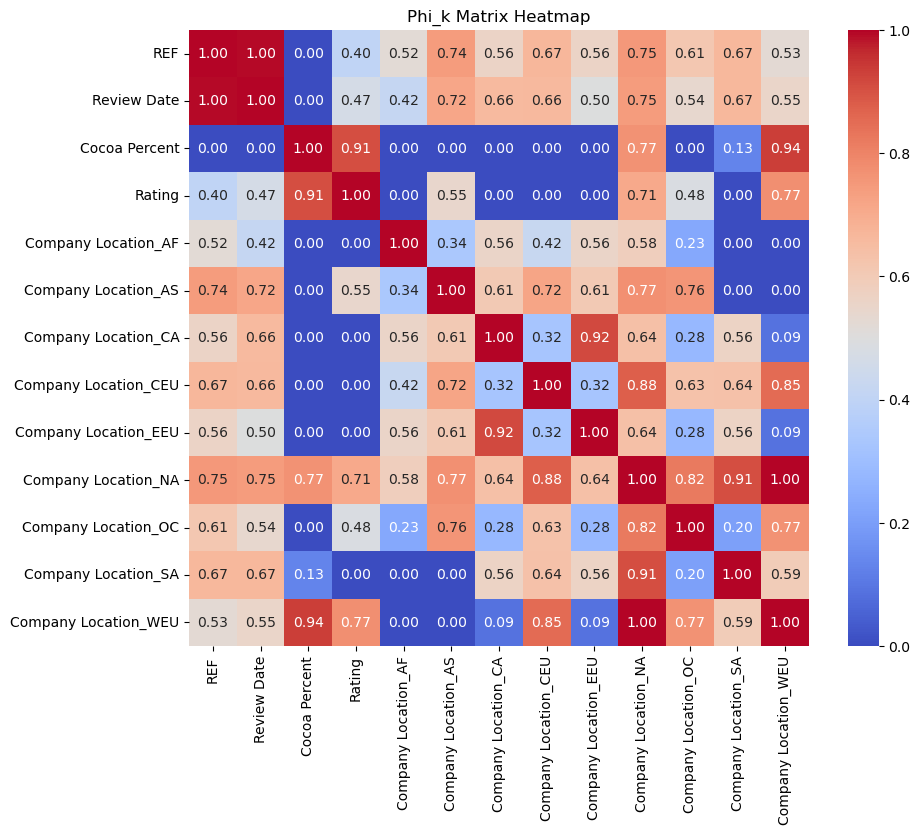

In [70]:
import pandas as pd
import phik
#from phik import resources, report

# Pearson's correlation matrix between numeric variables (pandas functionality)
print(f"Encoded data: \n{df_encoded}")

corr_df = df_encoded.corr()
print(f"\nCorrelation Matrix: \n{df_encoded}")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# get the phi_k correlation matrix between all variables
phik_df = corr_df.phik_matrix()
print(f"\nPhi_k correlation matrix: \n{phik_df}")
plt.figure(figsize=(10, 8))
sns.heatmap(phik_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phi_k Matrix Heatmap')
plt.show()

# get global correlations based on phi_k correlation matrix
# glbl_phik = phik_df.global_phik()
# print("global correlation based on phi_k: ", glbl_phik)
# plt.figure(figsize=(10, 8))
# sns.heatmap(glbl_phik, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Global Phi_k Matrix Heatmap')
# plt.show()

# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
# sig_df = glbl_phik.significance_matrix()
# print("significance matrix: ", sig_df)
# contingency table of two columns
# cols = ['mileage','car_size']
# corr_df[cols].hist2d()

# # normalized residuals of contingency test applied to cols
# df[cols].outlier_significance_matrix()

# # show the normalized residuals of each variable-pair
# df.outlier_significance_matrices()

# # generate a phik correlation report and save as test.pdf
# report.correlation_report(df, pdf_file_name='test.pdf')